In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of rws.RWS failed: Traceback (most recent call last):
  File "/Users/salem/anaconda3/envs/.deep/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/salem/anaconda3/envs/.deep/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/salem/anaconda3/envs/.deep/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/salem/anaconda3/envs/.deep/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 600, in _exec
AttributeError: 'NoneType' object has no attribute 'name'
]


In [87]:
import sys
sys.path.append("..")
from data.gmm_gen import GMMDataGen
from rws.model import BasicModel
from rws import RWS, Vae, IWAE
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torchvision import datasets, transforms
import torch
from functools import partial

In [88]:
transform = transforms.Compose((
    transforms.ToTensor(),
    partial(torch.flatten, start_dim=1),
    partial(torch.gt, other=0.5),
    partial(lambda x: x.float()))
)
dataset = datasets.MNIST('../data', train=True, download=True,
                         transform=transform)

In [105]:
input_dim = dataset[0][0].shape[1]
train_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

model = BasicModel(input_dim, hidden_dim=400, hidden_layers=1, encoding_dim=20, mode='MNIST')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

vae = Vae(model, optimizer, mode='MNIST')

model2 = BasicModel(input_dim, 200, 2, 50)
optimizer2 = torch.optim.Adam(model.parameters(), lr=1e-3)

iwae = IWAE(model2, optimizer2, K=5, RP=True)

In [106]:
for epoch in range(2):
    print('Epoch %s' % epoch)
    for (i, batch) in enumerate(train_loader):
        data = batch[0]
        loss = vae.train_step(data)
        if i % 1000 == 0:
            print("epoch {}, batch {}, loss {}".format(epoch, i, loss.item()))


Epoch 0
epoch 0, batch 0, loss 8828.5927734375
epoch 0, batch 1000, loss 1888.5216064453125
epoch 0, batch 2000, loss 1700.099853515625
epoch 0, batch 3000, loss 1447.4071044921875
Epoch 1
epoch 1, batch 0, loss 1707.974609375
epoch 1, batch 1000, loss 1611.927734375
epoch 1, batch 2000, loss 1833.9698486328125
epoch 1, batch 3000, loss 1562.8955078125


In [104]:
for epoch in range(2):
    print('Epoch %s' % epoch)
    for (i, batch) in enumerate(train_loader):
        data = batch[0]
        _, _, loss = iwae.train_step(data)
        if i % 1000 == 0:
            print("epoch {}, batch {}, loss {}".format(epoch, i, loss.item()))


Epoch 0
epoch 0, batch 0, loss 543.5508422851562
epoch 0, batch 1000, loss 543.5103149414062
epoch 0, batch 2000, loss 543.5983276367188
epoch 0, batch 3000, loss 544.0640869140625
Epoch 1
epoch 1, batch 0, loss 543.2626342773438
epoch 1, batch 1000, loss 543.9031982421875
epoch 1, batch 2000, loss 543.36181640625
epoch 1, batch 3000, loss 544.0555419921875


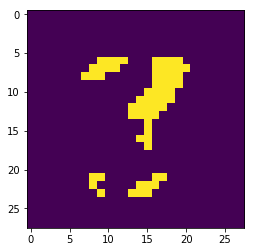

In [108]:
plt.imshow(model.sample(1).reshape(28, 28).detach().numpy())